In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [ ]:
final=pd.read_csv("final.csv")

In [ ]:
final

,정류장,호선_개수,주변_편의시설_개수,노선,위도,경도,주변_장애인시설_개수,지역구,주거_장애인_수,8월_장애인_승객수,9월_장애인_승객수,10월_장애인_승객수,평균_장애인_승객수
0,가락시장,4,20,3,37.492245,127.117757,0,송파구,20571,15118,16471,16307,15965.333333
1,강동구청,1,33,8,37.530341,127.120508,1,송파구,20571,8585,8704,9210,8833.000000
2,개롱,1,23,5,37.498079,127.134820,0,송파구,20571,7049,7045,7553,7215.666667
3,거여,1,18,5,37.493105,127.144150,3,송파구,20571,10204,10431,10910,10515.000000
4,경찰병원,1,22,3,37.495918,127.124540,0,송파구,20571,5616,5626,5626,5622.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,충정로(경기대입구),4,18,2,37.559704,126.964378,2,서대문구,12348,10636,10434,11155,10741.666667
237,홍제,1,48,3,37.589066,126.943736,0,서대문구,12348,16785,18801,18801,18129.000000
238,미아(서울사이버대학),1,64,4,37.626670,127.025983,4,강북구,17186,17114,19043,19043,18400.000000
239,미아사거리,1,31,4,37.613292,127.030053,0,강북구,17186,28940,30693,30693,30108.666667


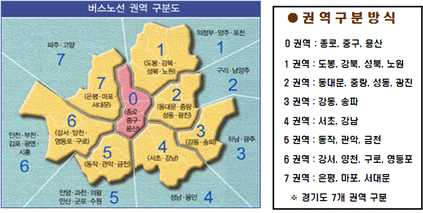

df1: 1권역+2권역: ['도봉구', '강북구', '성북구', '노원구','동대문구','중랑구','성동구','광진구']  
df2: 3권역+4권역: ['강동구', '송파구', '서초구', '강남구']  
df3: 5권역+6권역: ['동작구', '관악구', '금천구', '강서구','양천구','영등포구','구로구']  
df4: 7권역+0권역: ['종로구', '중구', '용산구', '은평구','마포구','서대문구']

In [ ]:
df1= final[final['지역구'].isin(['도봉구', '강북구', '성북구', '노원구','동대문구','중랑구','성동구','광진구'])]
df2= final[final['지역구'].isin(['강동구', '송파구', '서초구', '강남구'])]
df3= final[final['지역구'].isin(['동작구', '관악구', '금천구', '강서구','양천구','영등포구','구로구'])]
df4= final[final['지역구'].isin(['종로구', '중구', '용산구', '은평구','마포구','서대문구'])]

In [ ]:
df1.reset_index(drop=True,inplace=True)
df2.reset_index(drop=True,inplace=True)
df3.reset_index(drop=True,inplace=True)
df4.reset_index(drop=True,inplace=True)
df1

,정류장,호선_개수,주변_편의시설_개수,노선,위도,경도,주변_장애인시설_개수,지역구,주거_장애인_수,8월_장애인_승객수,9월_장애인_승객수,10월_장애인_승객수,평균_장애인_승객수
0,강변(동서울터미널),1,8,2,37.535095,127.094681,0,광진구,12183,15197,16128,17547,16290.666667
1,건대입구,4,36,2,37.540373,127.069191,0,광진구,12183,25923,26136,27946,26668.333333
2,광나루(장신대),1,12,5,37.545303,127.103570,0,광진구,12183,7962,8240,9144,8448.666667
3,구의(광진구청),1,31,2,37.537077,127.085916,0,광진구,12183,16115,16311,17218,16548.000000
4,군자(능동),4,34,5,37.557088,127.079577,0,광진구,12183,20283,20080,21722,20695.000000
5,뚝섬유원지,1,5,7,37.531540,127.066704,0,광진구,12183,6427,6840,7390,6885.666667
6,아차산(어린이대공원후문),1,12,5,37.551691,127.089761,4,광진구,12183,13228,13737,15206,14057.000000
7,어린이대공원(세종대),1,23,7,37.548014,127.074658,0,광진구,12183,7398,8252,9450,8366.666667
8,중곡,1,14,7,37.565923,127.084320,0,광진구,12183,12234,12185,12962,12460.333333
9,고려대(종암),1,10,6,37.590508,127.036296,0,성북구,17471,5816,6140,6418,6124.666667


In [ ]:
df1_X=df1[['호선_개수','주변_편의시설_개수','주변_장애인시설_개수','평균_장애인_승객수','주거_장애인_수']]
df2_X=df2[['호선_개수','주변_편의시설_개수','주변_장애인시설_개수','평균_장애인_승객수','주거_장애인_수']]
df3_X=df3[['호선_개수','주변_편의시설_개수','주변_장애인시설_개수','평균_장애인_승객수','주거_장애인_수']]
df4_X=df4[['호선_개수','주변_편의시설_개수','주변_장애인시설_개수','평균_장애인_승객수','주거_장애인_수']]
df1_X

,호선_개수,주변_편의시설_개수,주변_장애인시설_개수,평균_장애인_승객수,주거_장애인_수
0,1,8,0,16290.666667,12183
1,4,36,0,26668.333333,12183
2,1,12,0,8448.666667,12183
3,1,31,0,16548.000000,12183
4,4,34,0,20695.000000,12183
5,1,5,0,6885.666667,12183
6,1,12,4,14057.000000,12183
7,1,23,0,8366.666667,12183
8,1,14,0,12460.333333,12183
9,1,10,0,6124.666667,17471


### scaling-centering(표준화)

In [ ]:
from sklearn.preprocessing import StandardScaler
# StandardScaler 객체 생성
scaler = StandardScaler()

In [ ]:
def centering(df):
    #for i in range(len(df)):


    # 모든 열을 표준화
    df_standardized = scaler.fit_transform(df[['호선_개수','주변_편의시설_개수','주변_장애인시설_개수','평균_장애인_승객수','주거_장애인_수']])
    # 결과를 데이터프레임으로 변환
    df_standardized = pd.DataFrame(df_standardized, columns=['호선_개수','주변_편의시설_개수','주변_장애인시설_개수','평균_장애인_승객수','주거_장애인_수'])
    #result=pd.merge(df_standardized,df[['index']],right_index=True,left_index=True)
    return df_standardized

In [ ]:
df1_X_centering=centering(df1_X)
df2_X_centering=centering(df2_X)
df3_X_centering=centering(df3_X)
df4_X_centering=centering(df4_X)

In [ ]:
df1_X_centering.head(10)

,호선_개수,주변_편의시설_개수,주변_장애인시설_개수,평균_장애인_승객수,주거_장애인_수
0,-0.444652,-0.924538,-0.505382,0.221270,-0.973945
1,2.134329,0.307168,-0.505382,1.409457,-0.973945
2,-0.444652,-0.748580,-0.505382,-0.676597,-0.973945
3,-0.444652,0.087221,-0.505382,0.250733,-0.973945
4,2.134329,0.219189,-0.505382,0.725542,-0.973945
5,-0.444652,-1.056506,-0.505382,-0.855552,-0.973945
6,-0.444652,-0.748580,1.481884,-0.034473,-0.973945
7,-0.444652,-0.264695,-0.505382,-0.685985,-0.973945
8,-0.444652,-0.660601,-0.505382,-0.217282,-0.973945
9,-0.444652,-0.836559,-0.505382,-0.942682,-0.001788


### PCA로 가중치 구하고 점수 매기기

In [ ]:
from sklearn.decomposition import PCA

# 주성분 분석 수행
pca = PCA()

In [ ]:
def pcadf(df):
    pca.fit(df)
    # 주성분에 대한 설명력 확인
    explained_variance_ratio = pca.explained_variance_ratio_
    # 각 변수의 중요성을 기반으로 가중치 설정
    weights = explained_variance_ratio / sum(explained_variance_ratio)
    df['Score'] =df.apply(lambda row: sum(row[col] * weights[i] for i, col in enumerate(df.columns)), axis=1)
    print('Weights of ', ', '.join(map(str, explained_variance_ratio )))


In [ ]:
pcadf(df1_X_centering)

Weights of  0.4172497452440332, 0.2492011269353209, 0.15216664074367903, 0.11577829832852024, 0.0656041887484465


In [ ]:
pcadf(df2_X_centering)

Weights of  0.3738363571827305, 0.24113918665453218, 0.18785833453200732, 0.14162002065249885, 0.055546100978231275


In [ ]:
pcadf(df3_X_centering)

Weights of  0.36022909230478084, 0.23474138672724906, 0.19380510355680985, 0.15538332696054574, 0.055841090450614694


In [ ]:
pcadf(df4_X_centering)

Weights of  0.40383714477160615, 0.2722979308140158, 0.15980443428344582, 0.0964457762054238, 0.06761471392550844


### 최종 dataset

In [ ]:
score1=df1_X_centering[['Score']]
score2=df2_X_centering[['Score']]
score3=df3_X_centering[['Score']]
score4=df4_X_centering[['Score']]
score1

,Score
0,-0.531106
1,0.989482
2,-0.591210
3,-0.275563
4,0.888375
5,-0.688665
6,-0.214471
7,-0.471713
8,-0.516107
9,-0.580164


In [ ]:
result_df1 = pd.concat([df1, score1], axis=1)
result_df2 = pd.concat([df2, score2], axis=1)
result_df3 = pd.concat([df3, score3], axis=1)
result_df4 = pd.concat([df4, score4], axis=1)

In [ ]:
result_df1.to_csv("df1_final.csv",index = False, encoding="utf-8")
result_df2.to_csv("df2_final.csv",index = False, encoding="utf-8")
result_df3.to_csv("df3_final.csv",index = False, encoding="utf-8")
result_df4.to_csv("df4_final.csv",index = False, encoding="utf-8")

In [ ]:
result_df1

,정류장,호선_개수,주변_편의시설_개수,노선,위도,경도,주변_장애인시설_개수,지역구,주거_장애인_수,8월_장애인_승객수,9월_장애인_승객수,10월_장애인_승객수,평균_장애인_승객수,Score
0,강변(동서울터미널),1,8,2,37.535095,127.094681,0,광진구,12183,15197,16128,17547,16290.666667,-0.531106
1,건대입구,4,36,2,37.540373,127.069191,0,광진구,12183,25923,26136,27946,26668.333333,0.989482
2,광나루(장신대),1,12,5,37.545303,127.103570,0,광진구,12183,7962,8240,9144,8448.666667,-0.591210
3,구의(광진구청),1,31,2,37.537077,127.085916,0,광진구,12183,16115,16311,17218,16548.000000,-0.275563
4,군자(능동),4,34,5,37.557088,127.079577,0,광진구,12183,20283,20080,21722,20695.000000,0.888375
5,뚝섬유원지,1,5,7,37.531540,127.066704,0,광진구,12183,6427,6840,7390,6885.666667,-0.688665
6,아차산(어린이대공원후문),1,12,5,37.551691,127.089761,4,광진구,12183,13228,13737,15206,14057.000000,-0.214471
7,어린이대공원(세종대),1,23,7,37.548014,127.074658,0,광진구,12183,7398,8252,9450,8366.666667,-0.471713
8,중곡,1,14,7,37.565923,127.084320,0,광진구,12183,12234,12185,12962,12460.333333,-0.516107
9,고려대(종암),1,10,6,37.590508,127.036296,0,성북구,17471,5816,6140,6418,6124.666667,-0.580164


## 상위 20개 노선 뽑기

In [ ]:
df1_2 = pd.concat([result_df1, result_df2], axis=0)
df1_2.reset_index(drop=True,inplace=True)

df2_3 = pd.concat([result_df2, result_df3], axis=0)
df2_3.reset_index(drop=True,inplace=True)

df3_4 = pd.concat([result_df3, result_df4], axis=0)
df3_4.reset_index(drop=True,inplace=True)

df4_1 = pd.concat([result_df4, result_df1], axis=0)
df4_1.reset_index(drop=True,inplace=True)

In [ ]:
df1_2_final = df1_2.nlargest(20, 'Score')
df2_3_final = df2_3.nlargest(20, 'Score')
df3_4_final = df3_4.nlargest(20, 'Score')
df4_1_final = df4_1.nlargest(20, 'Score')
df4_1_final

,정류장,호선_개수,주변_편의시설_개수,노선,위도,경도,주변_장애인시설_개수,지역구,주거_장애인_수,8월_장애인_승객수,9월_장애인_승객수,10월_장애인_승객수,평균_장애인_승객수,Score
10,종로3가,9,114,1,37.570406,126.991847,0,종로구,5834,57170,59659,64345,60391.333333,2.923753
84,노원,4,108,4,37.656270,127.063276,4,노원구,26696,37141,38617,40331,38696.333333,2.415640
40,서울역,12,18,1,37.556228,126.972135,4,중구,5552,44849,45634,49335,46606.000000,2.276855
78,신설동,6,36,1,37.576048,127.024634,0,성북구,17471,20937,21668,23211,21938.666667,1.707949
109,왕십리(성동구청),6,34,2,37.561238,127.036954,0,성동구,11092,14088,14286,15193,14522.333333,1.510778
13,공덕,10,26,5,37.544431,126.951372,0,마포구,12904,17277,17553,18888,17906.000000,1.355769
36,동대문역사문화공원,9,30,2,37.565613,127.009054,0,중구,5552,19617,19949,20756,20107.333333,1.185107
33,응암,1,42,6,37.598605,126.915577,6,은평구,21732,17652,18080,19266,18332.666667,1.004324
64,건대입구,4,36,2,37.540373,127.069191,0,광진구,12183,25923,26136,27946,26668.333333,0.989482
120,수유(강북구청),1,77,4,37.638052,127.025732,6,강북구,17186,33465,35855,35855,35058.333333,0.988006


In [ ]:
df1_2_final.to_csv("df1_2_final.csv",index = False, encoding="utf-8")
df2_3_final.to_csv("df2_3_final.csv",index = False, encoding="utf-8")
df3_4_final.to_csv("df3_4_final.csv",index = False, encoding="utf-8")
df4_1_final.to_csv("df4_1_final.csv",index = False, encoding="utf-8")

## 걍 gower method

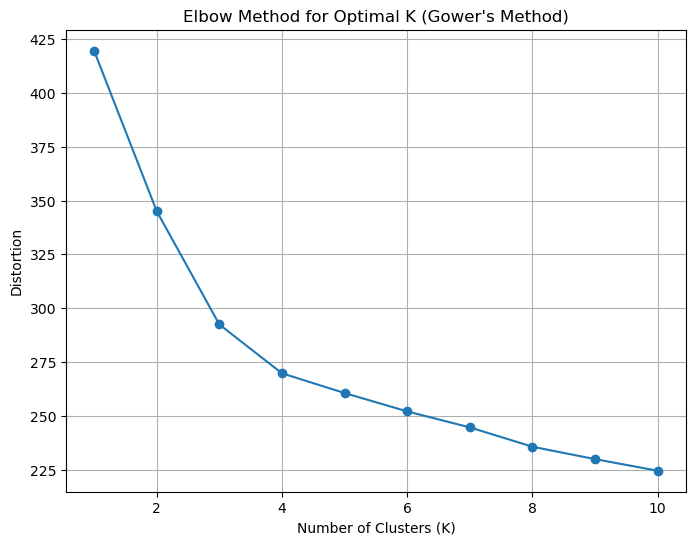

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial.distance import squareform, pdist
from scipy.spatial.distance import squareform, pdist

# Gower's Method를 사용하여 데이터 간의 거리 행렬 계산
def gower_distance(X):
    n, m = X.shape
    D = np.zeros((n, n))

    for i in range(n):
        for j in range(i+1, n):
            sum_sij = 0
            for k in range(m):
                if pd.api.types.is_numeric_dtype(X[i, k]) and pd.api.types.is_numeric_dtype(X[j, k]):
                    sum_sij += abs(X[i, k] - X[j, k])
                elif X[i, k] == X[j, k]:
                    sum_sij += 0
                else:
                    sum_sij += 1

            D[i, j] = D[j, i] = sum_sij / m

    return D

# 예시 데이터 생성

# Gower's Method를 사용하여 거리 행렬 계산
distance_matrix = gower_distance(final.values)

# Elbow Method를 사용하여 최적의 K 값을 찾기
distortions = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(distance_matrix)
    distortions.append(kmeans.inertia_)  # inertia_는 군집 내의 제곱 거리의 합

# Elbow Method 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(K_range, distortions, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K (Gower\'s Method)')
plt.grid(True)